In [32]:
from pathlib import Path
from main import load_run_h5, load_pickle, unet_model
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [16]:
root = Path("/hpc/home/bel25/tdunn/bel25/RACTS/results")
proj = 'exp_1'
trial = "epochs-10_version-2_bsz-4_ntrain-1000_n_val-250_irt_mode-classic"
folder = root / proj / trial

img_paths = []
hist_paths = []
# wts_paths = []
model_paths = []
sample_rates = []
for fp in folder.iterdir():
    if 'HIST' in fp.name:
        hist_paths.append(fp)
    if 'IMGS' in fp.name:
        img_paths.append(fp)
        # get SR
        sr = float(fp.stem.split('sr-')[-1])
        sample_rates.append(sr)
    if 'MODEL' in fp.name:
        model_paths.append(fp)
#     if 'WTS' in fp.name:
#         wts_paths.append(fp)
    

PosixPath('/hpc/home/bel25/tdunn/bel25/RACTS/results/exp_1/epochs-1_version-2_bsz-4_ntrain-5_n_val-5_irt_mode-classic/WTS_sr-0.0625.data-00000-of-00001')

In [ ]:
## Restore the model
# new_model = tf.keras.models.load_model(model_paths[0])

In [23]:
img_dicts = [load_run_h5(p) for p in img_paths]
hist_dicts = [load_pickle(p) for p in hist_paths]

In [37]:
# # before unet
# def plot_trial_imgs(img_dict):
#     sample_rates = [sr]
#     fig, axs = plt.subplots(n, 5, squeeze=False, figsize=(10, n*2))
#     for i in range(n):


#         axs[i, 0].imshow(np.clip(input_scans[i],0,0.5), cmap='gray')
#         axs[i, 0].set_yticklabels([])
#         axs[i, 0].set_xticklabels([])
#         axs[i, 0].set_xticks([])
#         axs[i, 0].set_yticks([])
#         axs[i, 0].set_ylabel('SR:{}'.format(sr))

#         axs[i, 1].imshow(input_sinos[i], cmap='gray')
#         axs[i, 1].axis('off')


#         axs[i, 2].imshow(sampled_sinos[i], cmap='gray')
#         axs[i, 2].axis('off')


#         axs[i, 3].imshow(out_sinos[i], cmap='gray')
#         axs[i, 3].axis('off')


#         axs[i, 4].imshow(np.clip(out_scans[i],0,0.5), cmap='gray')
#         axs[i, 4].axis('off')


#         if i == 0:
#             axs[i, 0].set_title('Scan')
#             axs[i, 1].set_title('Sinogram')
#             axs[i, 2].set_title('Sampled')
#             axs[i, 3].set_title('Sinogram Recon')
#             axs[i, 4].set_title('Scan Recon (FBP)')    

#     # plt.savefig(f'nplot-{n}_v{2}_ntrain-{n_train}_nval{n_val}_bsz-{ds_bsz}_epochs-{epochs}_sr-{sr}.png')
#     plt.tight_layout()
#     plt.show()


In [29]:
img_dicts[0].keys()

dict_keys(['input_sinos', 'input_scans', 'sampled_sinos', 'out_sinos', 'out_scans'])

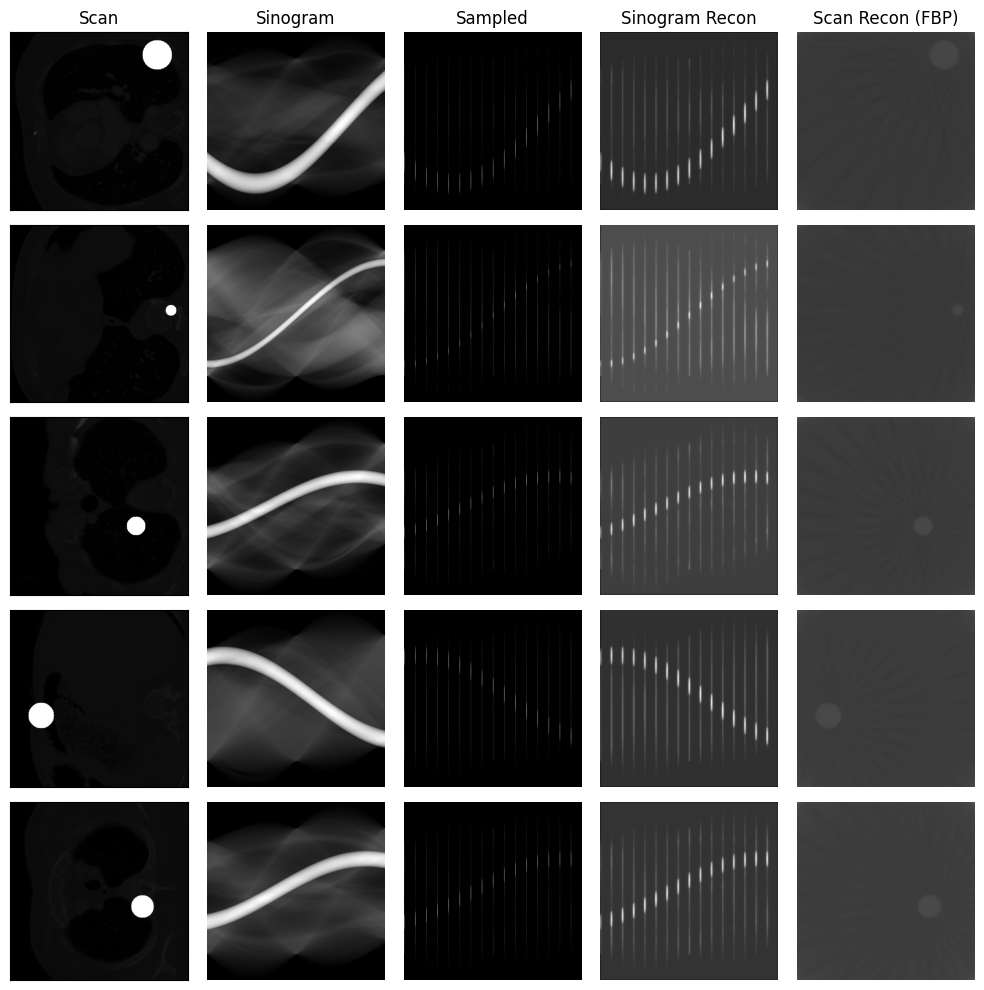

In [36]:
# before unet
def plot_trial_imgs(img_dict, clip=False):
    input_sinos = img_dict["input_sinos"]
    input_scans = img_dict["input_scans"]
    sampled_sinos = img_dict["sampled_sinos"]
    out_sinos = img_dict["out_sinos"]
    out_scans = img_dict["out_scans"]

    n = len(input_scans)
    fig, axs = plt.subplots(n, 5, squeeze=False, figsize=(10, n*2))
    for i in range(n):
        
        if clip:
            input_scan = np.clip(input_scans[i],0,0.5)
            out_scan = np.clip(out_scans[i],0,0.5)
        else:
            input_scan = input_scans[i]
            out_scan = out_scans[i]
            
        axs[i, 0].imshow(input_scan, cmap='gray')
        axs[i, 0].set_yticklabels([])
        axs[i, 0].set_xticklabels([])
        axs[i, 0].set_xticks([])
        axs[i, 0].set_yticks([])
#         axs[i, 0].set_ylabel('SR:{}'.format(sr))

        axs[i, 1].imshow(input_sinos[i], cmap='gray')
        axs[i, 1].axis('off')


        axs[i, 2].imshow(sampled_sinos[i], cmap='gray')
        axs[i, 2].axis('off')


        axs[i, 3].imshow(out_sinos[i], cmap='gray')
        axs[i, 3].axis('off')


        axs[i, 4].imshow(out_scan, cmap='gray')
        axs[i, 4].axis('off')


        if i == 0:
            axs[i, 0].set_title('Scan')
            axs[i, 1].set_title('Sinogram')
            axs[i, 2].set_title('Sampled')
            axs[i, 3].set_title('Sinogram Recon')
            axs[i, 4].set_title('Scan Recon (FBP)')    

    # plt.savefig(f'nplot-{n}_v{2}_ntrain-{n_train}_nval{n_val}_bsz-{ds_bsz}_epochs-{epochs}_sr-{sr}.png')
    plt.tight_layout()
    plt.show()

plot_trial_imgs(img_dicts[0], clip=False)  

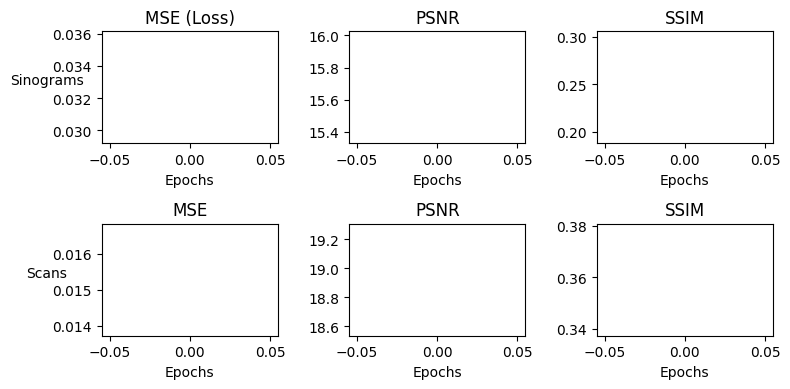

In [39]:
from collections import defaultdict

# sample_rates = [0.1]
# histories = [hist]
# metric_dict = defaultdict(list)
# for history in histories:        
#     for k,v in history.history.items():
#         metric_dict[k].append(v)

hist_dict = hist_dicts[0]
xlabel = 'Epochs'
x_vals = np.arange(len(hist_dict['loss']))
n_metric = len(hist_dict)
fig, axs = plt.subplots(2,3, squeeze=False, figsize=(8,4))
for k,v in hist_dict.items():
# for k,v_lst in metric_dict.items():
#     for sr,v in zip(sample_rates, v_lst): 
        if 'scan' in k:
            row = 1
        else:
            row = 0

        if 'val' in k:
            label = 'val'
        else:
            label = 'train'
            
#         if len(sample_rates) > 1:
#             label += "_{:.2f}".format(sr)

        if 'loss' in k:
            axs[row, 0].plot(x_vals, v, label=label)
            axs[row, 0].set_xlabel(xlabel, ) 
            axs[row, 0].set_ylabel('Sinograms', rotation=0) 
            axs[row, 0].set_title('MSE (Loss)') 
        
        if 'mse' in k:
            axs[row, 0].plot(x_vals, v, label=label)
            axs[row, 0].set_xlabel(xlabel)  
            axs[row, 0].set_ylabel('Scans', rotation=0) 
            axs[row, 0].set_title('MSE')  

        if 'psnr' in k:
            axs[row, 1].plot(x_vals, v, label=label)
            axs[row, 1].set_xlabel(xlabel)  
            axs[row, 1].set_title('PSNR')  

        if 'ssim' in k:
            axs[row, 2].plot(x_vals, v, label=label)
            axs[row, 2].set_xlabel(xlabel)  
            axs[row, 2].set_title('SSIM')  

plt.tight_layout()
plt.show()